# FACE APPLICATION

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**FACE DETECTION WITH HARRCASCADE IN OPEN CV**

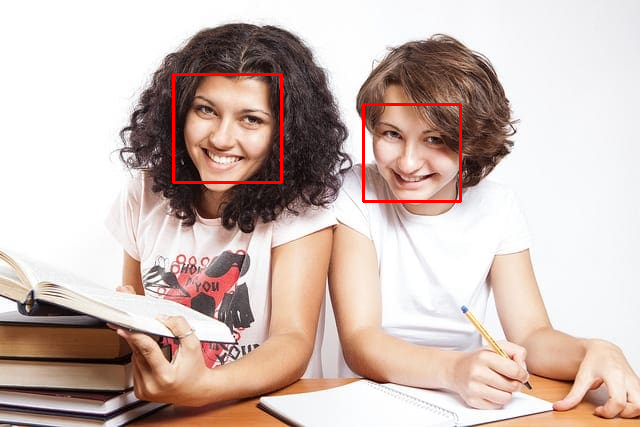

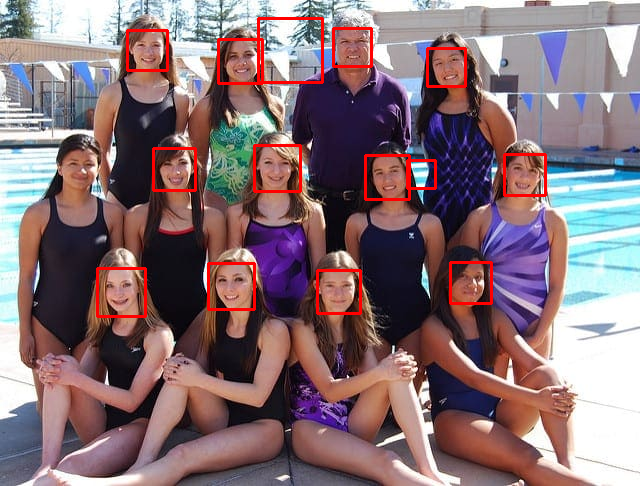

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow



#
classifier= cv.CascadeClassifier('/content/gdrive/MyDrive/ Face_data/ test_folder/haarcascade_frontalface_default.xml')
pixels=cv.imread('/content/gdrive/MyDrive/ Face_data/ test_folder/test1.jpg')
pixels2=cv.imread('/content/gdrive/MyDrive/ Face_data/ test_folder/test2.jpg')
bboxes=classifier.detectMultiScale(pixels)
bboxes1=classifier.detectMultiScale(pixels2)
for box in bboxes:
  x,y,width,height=box
  x2,y2=x+width,y+height
  cv.rectangle(pixels, (x,y),(x2,y2),(0,0,255),2)



cv2_imshow( pixels)


for box in bboxes1:
  x,y,width,height=box
  x2,y2=x+width,y+height
  cv.rectangle(pixels2, (x,y),(x2,y2),(0,0,255),2)

cv2_imshow( pixels2)


cv.destroyAllWindows()


In [5]:
!pip install mtcnn
!pip show mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.6 MB/s eta 0:00:00
Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras, opencv-python
Required-by: 


In [6]:
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot


pixels=pyplot.imread('/content/gdrive/MyDrive/ Face_data/ test_folder/test1.jpg')

detector=MTCNN()

faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

1/1 [==============================] - 0s 318ms/step
{'box': [372, 83, 102, 130], 'confidence': 0.9995276927947998, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 172), 'mouth_right': (438, 177)}}
{'box': [186, 69, 88, 118], 'confidence': 0.9993896484375, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 144), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}


1/1 [==============================] - 0s 179ms/step


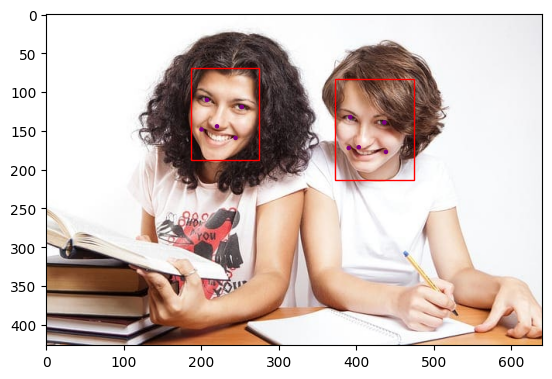

In [7]:
from mtcnn.mtcnn import MTCNN
import cv2
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
def draw_images_in_boxes(fileName, result_list):
  data = pyplot.imread(fileName)
  pyplot.imshow(data)

  axis = pyplot.gca()

  for result in result_list:
    x,y,width,height = result['box']

    rect = Rectangle((x,y),width,height,fill=False,color='red')

    axis.add_patch(rect)
    for _,value in result['keypoints'].items():
      dot = Circle(value, radius=2,color ='purple')
      axis.add_patch(dot)
  pyplot.show()


pixels = pyplot.imread('/content/gdrive/MyDrive/ Face_data/ test_folder/test1.jpg')

detector = MTCNN()

faces = detector.detect_faces(pixels)
fileName = '/content/gdrive/MyDrive/ Face_data/ test_folder/test1.jpg'
draw_images_in_boxes(fileName, faces)

# cap = cv2.VideoCapture(0)
# while True:
#     #Capture frame-by-frame
#     __, frame = cap.read()

#     #Use MTCNN to detect faces
#     result = detector.detect_faces(frame)
#     if result != []:
#         for person in result:
#             bounding_box = person['box']
#             keypoints = person['keypoints']

#             cv2.rectangle(frame,
#                           (bounding_box[0], bounding_box[1]),
#                           (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
#                           (0,155,255),
#                           2)

#             cv2.circle(frame,(keypoints['left_eye']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['right_eye']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['nose']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['mouth_left']), 2, (0,155,255), 2)
#             cv2.circle(frame,(keypoints['mouth_right']), 2, (0,155,255), 2)
#     #display resulting frame
#     cv2.imshow('frame',frame)
#     if cv2.waitKey(1) &0xFF == ord('q'):
#         break
# #When everything's done, release capture
# cap.release()
# cv2.destroyAllWindows()

##EXTRACT FACES##
In this section, we will try to extract faces that we detected using the pretrained model.


3/3 [==============================] - 0s 59ms/step


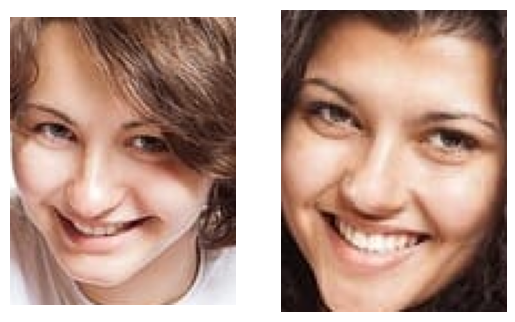

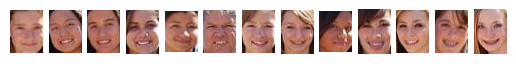

In [8]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

def extract_faces(filename, result_list):
  data=pyplot.imread(filename)
  for i in range(len(result_list)):
    x,y,width,height=result_list[i]['box']
    x2,y2=x+width,y+height
    pyplot.subplot(1,len(result_list), i+1)
    pyplot.axis('off')
    pyplot.imshow(data[y:y2,x:x2])
  pyplot.show()

filename='/content/gdrive/MyDrive/ Face_data/ test_folder/test1.jpg'
filename1='/content/gdrive/MyDrive/ Face_data/ test_folder/test2.jpg'
pixels=pyplot.imread(filename)
pixels1=pyplot.imread(filename1)
detector=MTCNN()

faces = detector.detect_faces(pixels)
faces1=detector.detect_faces(pixels1)
extract_faces(filename, faces)
extract_faces(filename1, faces1)



In [9]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-bzxml2fi
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-bzxml2fi
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8294 sha256=0fd5520399e2f61e4fa9c3c16ab1f9cd5df2db1040626324d0430b5049676016
  Stored in directory: /tmp/pip-ephem-wheel-cache-5ooaa8zs/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface


In [10]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 


In [11]:
!pip install keras_applications


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.5 MB/s eta 0:00:00


In [12]:
!pip install keras==2.2.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.2.4 which is incompatible.


In [13]:
import keras_vggface
print(keras_vggface.__version__)

0.6


1/1 [==============================] - 0s 243ms/step


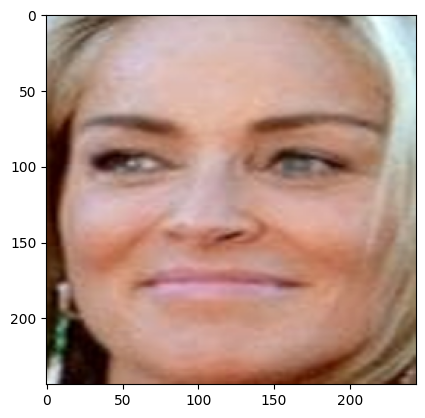

In [14]:
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
from PIL import Image
from numpy import asarray


def extract_face(filename, resize_query=(244,244)):
  pixels=pyplot.imread(filename)

  detector=MTCNN()
  face=detector.detect_faces(pixels)
  x,y,width,height=face[0]['box']
  x2,y2=x+width,y+height
  faces=pixels[y:y2,x:x2]
  image = Image.fromarray(faces)
  image = image.resize(resize_query)
  face_array=asarray(image)
  return face_array

pixels=extract_face('/content/gdrive/MyDrive/ Face_data/ test_folder/sharon_stone1.jpg')
pyplot.imshow(pixels)
pyplot.show()

In [15]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
import numpy as np
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from numpy import expand_dims
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

def extract_face(filename, resize_query=(224,224)):
  pixels=pyplot.imread(filename)
  detector=MTCNN()
  result=detector.detect_faces(pixels)
  x,y,width,height=result[0]['box']
  x2,y2=x+width,y+height
  face=pixels[y:y2,x:x2]
  image=Image.fromarray(face)
  image=image.resize(resize_query)
  face_array=asarray(image)
  return face_array

pixels=extract_face('/content/gdrive/MyDrive/ Face_data/ test_folder/sharon_stone1.jpg')
pixels=pixels.astype('float32')
samples=expand_dims(pixels, axis=0)
samples=preprocess_input(samples, version=2)
model=VGGFace(model='resnet50')
yhat=model.predict(samples)
results=decode_predictions(yhat)
for result in results[0]:
  print('%s: %.3f%%'%(result[0][3:-1],result[1]*100))


1/1 [==============================] - 0s 89ms/step


1351680/1346516 [==============================] - 0s 0us/step
Sharon_Stone: 99.660%
Noelle_Reno: 0.062%
Tina_Maze: 0.018%
Anita_Lipnicka: 0.015%
Emma_Atkins: 0.014%


In [16]:
yhat = model.predict(samples)

1/1 [==============================] - 0s 66ms/step


In [17]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from matplotlib import pyplot
from PIL import Image
import numpy as np
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN



def extract_face(fileName, resize_require=(224,224)):
  data = pyplot.imread(fileName)
  detector=MTCNN()
  result=detector.detect_faces(data)
  x,y,width,height=result[0]['box']
  x2,y2=x+width,y+height
  result=data[y:y2,x:x2]
  image=Image.fromarray(result)
  image=image.resize(resize_require)
  face_array=np.asarray(image)
  return face_array

def get_embeddings(filenames):
  faces=[extract_face(f) for f in filenames]
  samples=asarray(faces, 'float32')
  samples=preprocess_input(samples, version=2)
  model=VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3), pooling='avg')
  yhat= model.predict(samples)
  return yhat

def is_match(know_embedding, candidate_embedding, thresh=0.5):
  score=cosine(know_embedding,candidate_embedding)
  if score<=thresh:
    print('>Face is a Match (%.3f <= %.3f )'%(score,thresh))
  else:
    print('>Face is NOT a Match(%.3f >= %.3f)'%(score,thresh))

filenames=['/content/gdrive/MyDrive/ Face_data/ test_folder/channing_tatum.jpg','/content/gdrive/MyDrive/ Face_data/ test_folder/sharon_stone1.jpg','/content/gdrive/MyDrive/ Face_data/ test_folder/sharon_stone2.jpg','/content/gdrive/MyDrive/ Face_data/ test_folder/sharon_stone3.jpg']
embeddings=get_embeddings(filenames)

sharon=embeddings[1]

# Positve Result
print("Positve Result")
is_match(sharon,embeddings[2])
is_match(sharon,embeddings[3])

# Negative Result
print("Negative Result")
is_match(sharon,embeddings[0])


1/1 [==============================] - 2s 2s/step
Positve Result
>Face is a Match (0.470 <= 0.500 )
>Face is a Match (0.302 <= 0.500 )
Negative Result
>Face is NOT a Match(0.712 >= 0.500)


# Face Recognition using FaceNet
In this section, we will use the FaceNet model to recognize faces.

## Face Detection


In [18]:
from matplotlib import pyplot


#Face Detection using YOLO( You Only Live Once)


In [19]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.8/645.8 kB 9.8 MB/s eta 0:00:00


In [20]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/78.2 GB disk)


In [21]:
!pip install scikit-learn

Number of images: 1288
Number of unique people: 7


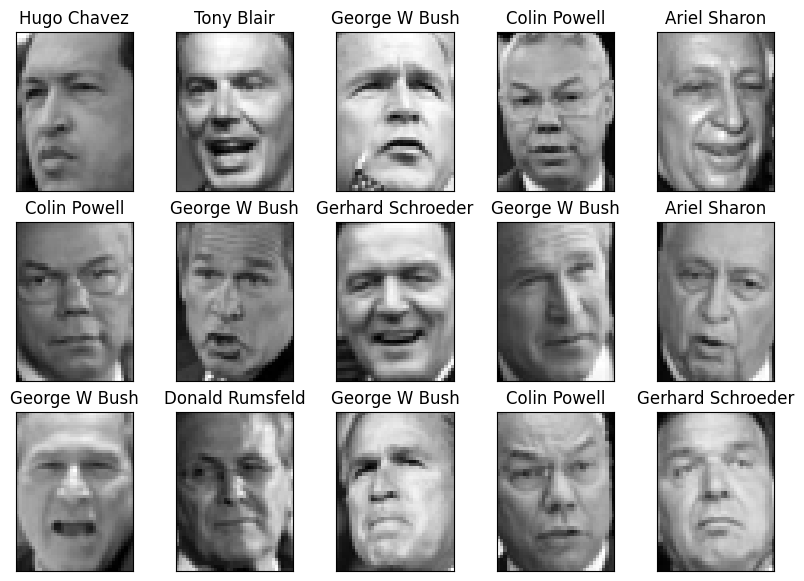

In [22]:
import sklearn
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Explore the dataset
print(f"Number of images: {len(lfw_people.images)}")
print(f"Number of unique people: {len(lfw_people.target_names)}")

# Visualize some of the images
fig, axes = plt.subplots(3, 5, figsize=(10, 7),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, ax in enumerate(axes.flat):
    ax.imshow(lfw_people.images[i], cmap='gray')
    ax.set_title(lfw_people.target_names[lfw_people.target[i]])

plt.show()


In [23]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IYi8e2X7hj437sWLrWpe")
project = rf.workspace("face-ahjbw").project("face-detection-5aojw")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existin

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.218, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Face-Detection-1 in yolov8:: 100%|██████████| 72/72 [00:00<00:00, 4139.63it/s]


In [25]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Face-Detection-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, ke

In [26]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Face-Detection-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.42it/s]
                   all          6          8      0.862      0.875      0.844      0.487
Speed: 0.3ms preprocess, 39.9ms inference, 0.0ms loss, 17.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [30]:
!yolo task=detect mode=predict model=/content/runs/detect/train1/weights/best.pt conf=0.5 source={dataset.location}/test/images

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 423, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 94, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 146, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened

In [29]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/9 /content/Face-Detection-1/test/images/img_336_jpg.rf.95f88d26946bd3dd9ae91529439c3ec6.jpg: 640x640 2 facess, 37.1ms
image 2/9 /content/Face-Detection-1/test/images/img_49_jpg.rf.da9bf701e29b8f46eabcd7ec52695360.jpg: 640x640 4 facess, 35.5ms
image 3/9 /content/Face-Detection-1/test/images/img_527_jpg.rf.325b04aed1ea717b1c3a6a9cd6e0e203.jpg: 640x640 7 facess, 35.4ms
image 4/9 /content/Face-Detection-1/test/images/img_5579_jpg.rf.81e9f3bec43a610b8fc91c93cd83c701.jpg: 640x640 2 facess, 35.4ms
image 5/9 /content/Face-Detection-1/test/images/img_5759_jpg.rf.f15e9aa3e05ce55ed9b0958a31305bba.jpg: 640x640 2 facess, 35.4ms
image 6/9 /content/Face-Detection-1/test/images/img_587_jpg.rf.d8dde703f90b73228c43b0a2f39d5088.jpg: 640x640 1 faces, 35.4ms
image 7/9 /content/Face-Detection-1/test/images/img_684_jpg.rf.838eaf06415

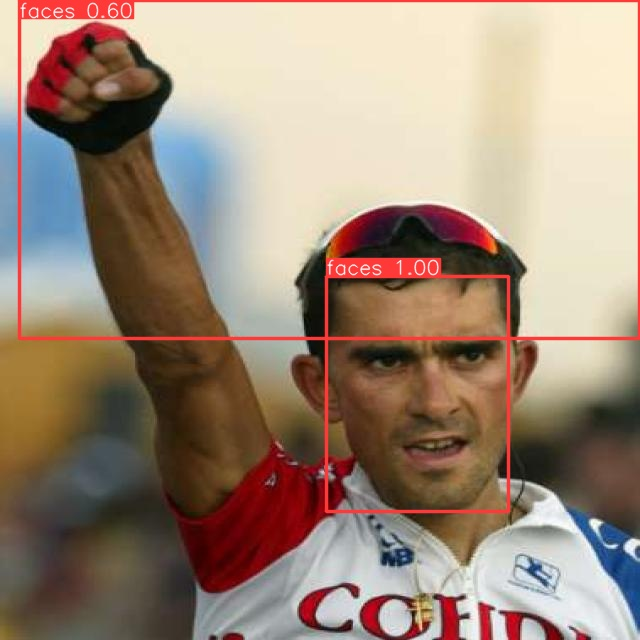

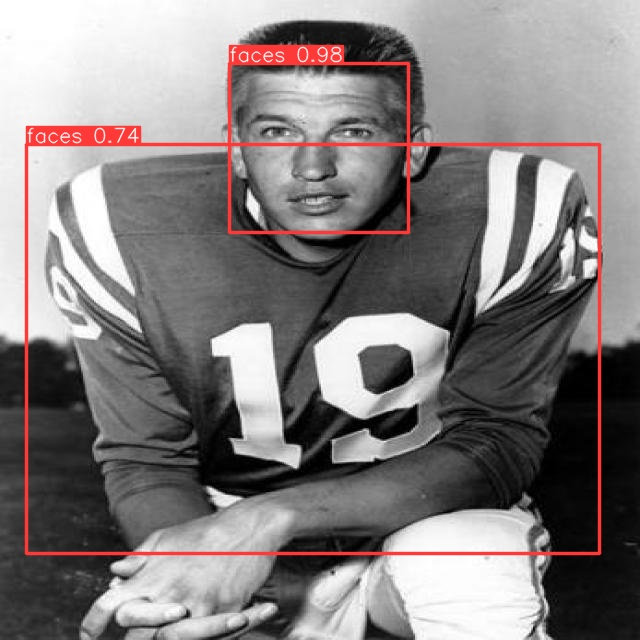

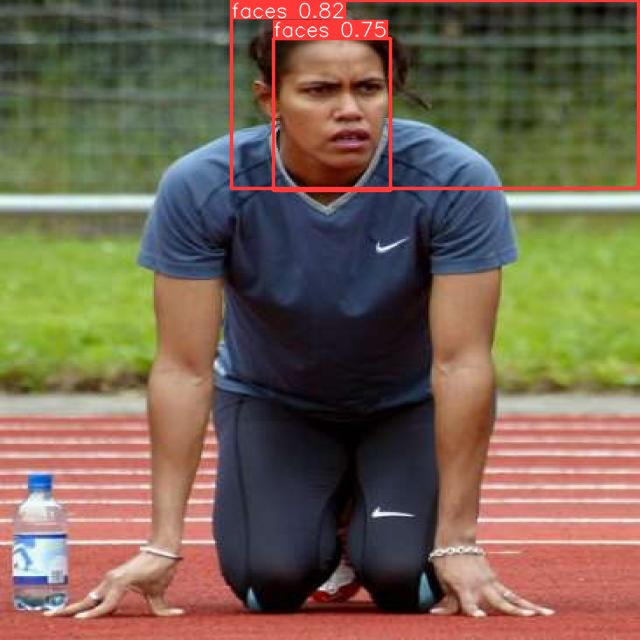

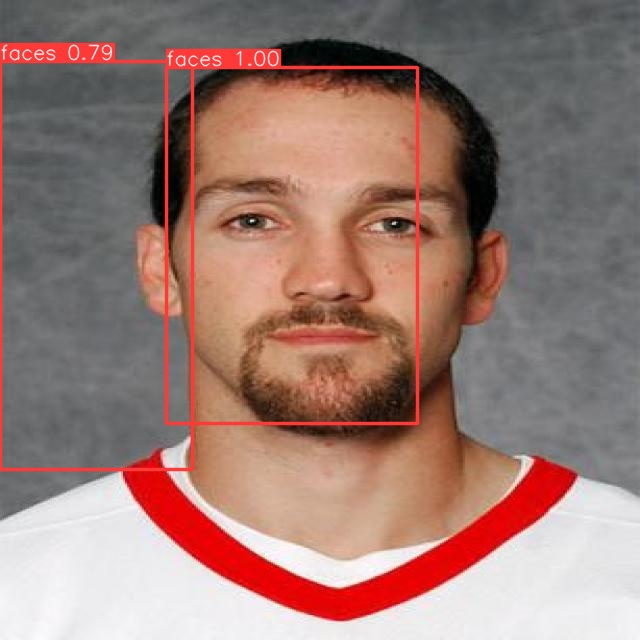

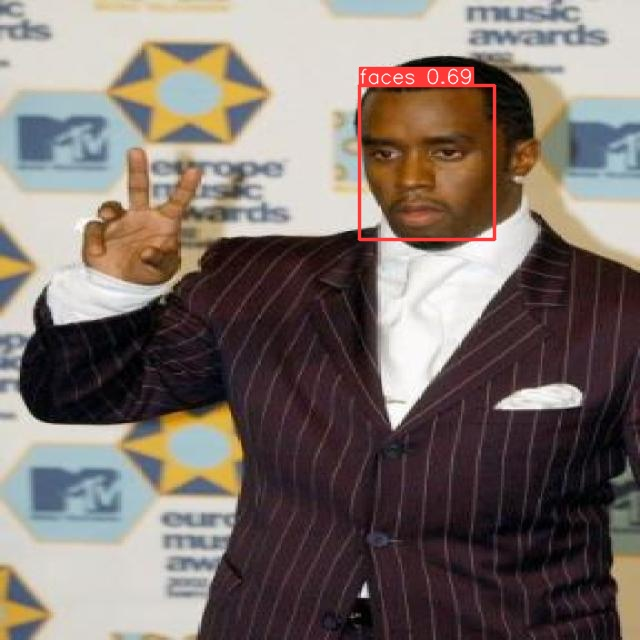

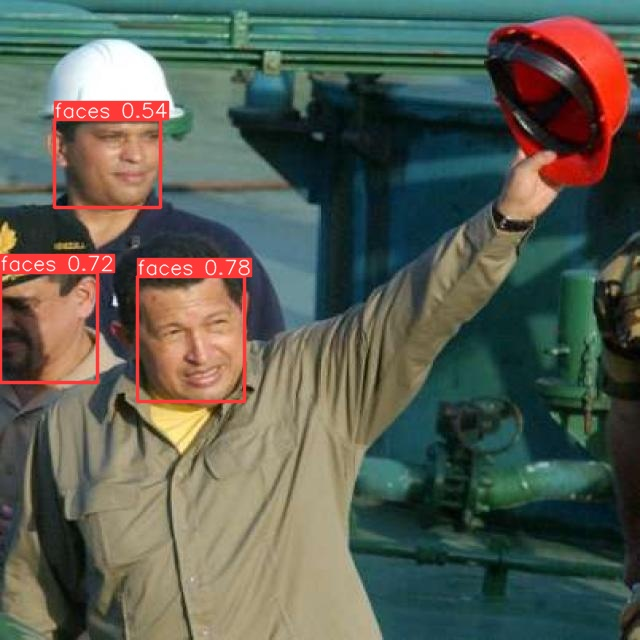

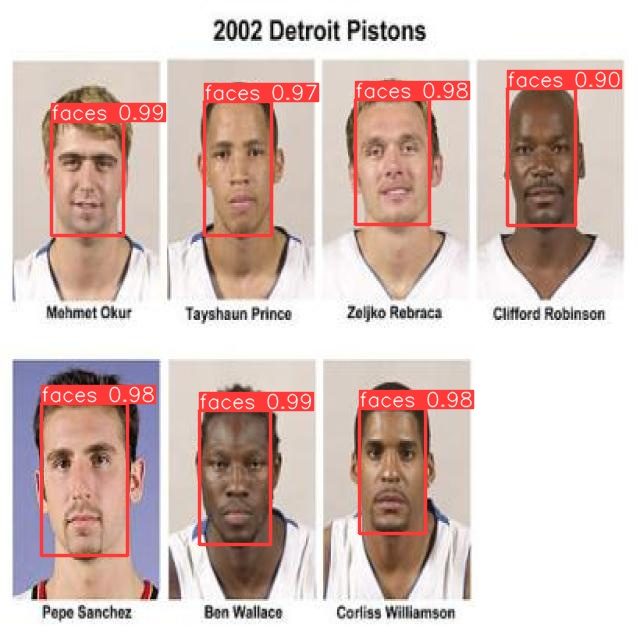

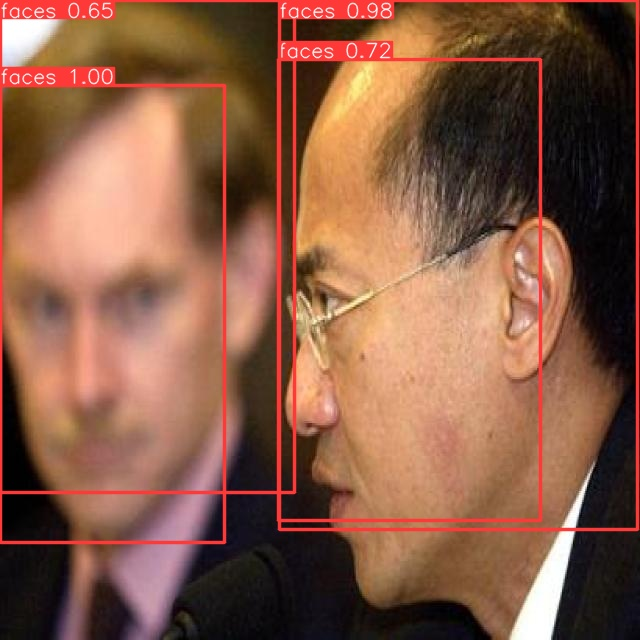

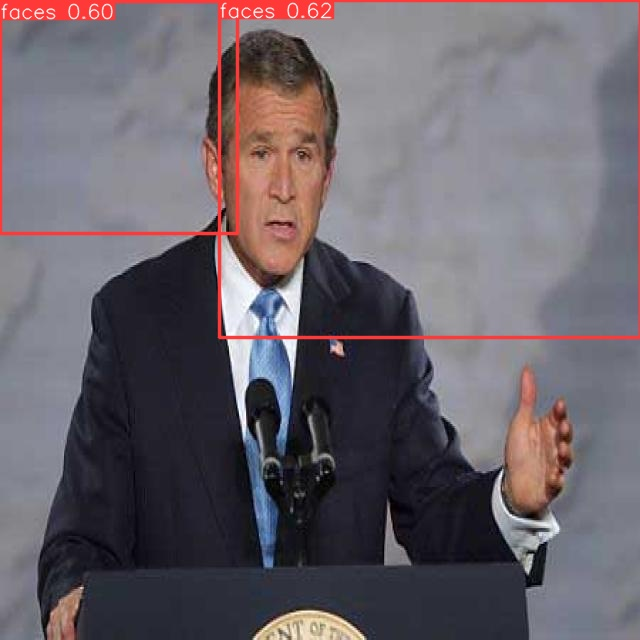

In [34]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict2/*.jpg'):
    display(Image(filename=image_path, height=400))
    print('\n')
